# <font color = blue> Problem Statement
TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

## <font color = purple> 1. Understanding Business Problem
    To identify whether defective % varies within 4 centers

## <font color = purple> 2. Given Data
    Level of Significance → α  = 0.05 (5% level of Significance, in other words 95% level of Confidence)

## <font color = purple> 3. Import Necessary Libraries

In [41]:
import pandas as pd
from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## <font color = purple> 4. Import Data

In [3]:
customer_order_form = pd.read_csv('CostomerOrderForm.csv')
customer_order_form.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [4]:
customer_order_form.tail()

,Phillippines,Indonesia,Malta,India
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free
299,Error Free,Defective,Defective,Error Free


In [5]:
type(customer_order_form)

pandas.core.frame.DataFrame

In [6]:
# How to show head() and tail() together 

In [7]:
pd.concat([customer_order_form.head(),customer_order_form.tail()],axis=1)

,Phillippines,Indonesia,Malta,India,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free,NaN,NaN,NaN,NaN
1,Error Free,Error Free,Error Free,Defective,NaN,NaN,NaN,NaN
2,Error Free,Defective,Defective,Error Free,NaN,NaN,NaN,NaN
3,Error Free,Error Free,Error Free,Error Free,NaN,NaN,NaN,NaN
4,Error Free,Error Free,Defective,Error Free,NaN,NaN,NaN,NaN
295,NaN,NaN,NaN,NaN,Error Free,Error Free,Error Free,Error Free
296,NaN,NaN,NaN,NaN,Error Free,Error Free,Error Free,Error Free
297,NaN,NaN,NaN,NaN,Error Free,Error Free,Defective,Error Free
298,NaN,NaN,NaN,NaN,Error Free,Error Free,Error Free,Error Free
299,NaN,NaN,NaN,NaN,Error Free,Defective,Defective,Error Free


## <font color = purple> How to show head() and tail() of a datased together side by side?

In [8]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [9]:
display_side_by_side(customer_order_form.head(),customer_order_form.tail(),titles=['Head','Tail'])

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
,Phillippines,Indonesia,Malta,India
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


## <font color = purple> 5. Data Understanding

In [10]:
customer_order_form.shape

(300, 4)

In [11]:
customer_order_form.dtypes

Phillippines    object
Indonesia       object
Malta           object
India           object
dtype: object

In [12]:
customer_order_form.describe(include='all')

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [13]:
col = list(customer_order_form)
col

['Phillippines', 'Indonesia', 'Malta', 'India']

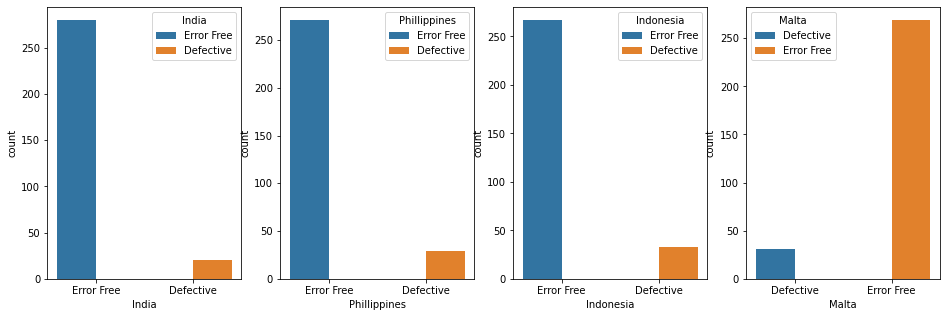

In [14]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
sns.countplot('India', hue= 'India', data=customer_order_form)

plt.subplot(1,4,2)
sns.countplot('Phillippines', hue= 'Phillippines', data=customer_order_form)

plt.subplot(1,4,3)
sns.countplot('Indonesia', hue= 'Indonesia', data=customer_order_form)

plt.subplot(1,4,4)
sns.countplot('Malta', hue= 'Malta', data=customer_order_form)
plt.show()

## <font color = purple> 6. Hypothesis Formulation
    H0 = Defective % does not varies within 4 centers.
    Ha = Defective % varies within 4 centers.
    α  = 0.05

## <font color = purple> 7. Perform Hypothesis Testing

### <font color = purple> *Since there are more than 2 variables, we will perform 'Chi-Square test'*

In [37]:
chi2,p_val_orders,dof_orders,expected_orders = chi2_contingency([customer_order_form['Phillippines'].value_counts(),
                                                                 customer_order_form['Indonesia'].value_counts(),
                                                                 customer_order_form['Malta'].value_counts(),
                                                                 customer_order_form['India'].value_counts(),])

In [40]:
print('Chi-Square test   :',chi2)
print('P-value           :',p_val_orders)
print('Degrees of Freedom:',dof_orders)
print('Expected Array    :\n',expected_orders)

Chi-Square test   : 3.8589606858203545
P-value           : 0.2771020991233144
Degrees of Freedom: 3
Expected Array    :
 [[271.75  28.25]
 [271.75  28.25]
 [271.75  28.25]
 [271.75  28.25]]


## <font color = purple> 8. Conclusion

In [29]:
# checking if 'α > P-value' or 'α < P-value'

In [30]:
if p_val_orders > 0.05:
    print('At 5% level of significance, we cannot reject the Null Hypothesis and we can say that defective % does not varies within 4 centers.')
else:
    print('At 5% level of significance, we can reject the Null Hypothesis and we can say that defective % varies within 4 centers.')

At 5% level of significance, we cannot reject the Null Hypothesis and we can say that defective % does not varies within 4 centers.


## <font color = purple> 9. Verifying the above conclusion manually

In [15]:
customer_order_form['India'].value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [16]:
round((20*100/280),4)

7.1429

In [17]:
customer_order_form['Phillippines'].value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [18]:
round((29*100/271),4)

10.7011

In [19]:
customer_order_form['Indonesia'].value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [20]:
round((33*100/267),4)

12.3596

In [21]:
customer_order_form['Malta'].value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [22]:
round((31*100/269),4)

11.5242